<a href="https://colab.research.google.com/github/adhilcodes/customer-segmentation/blob/main/customer_segmentation_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer segmentation on an automobile company customer data

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [73]:
data = pd.read_csv('/content/Train.xls')
val = pd.read_csv('/content/Test.xls')
data_orig = data.copy()

print(data.shape, val.shape)
data.head()

(8068, 11) (2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [74]:
data.drop(columns = ['ID', 'Var_1', 'Segmentation'],axis=1 ,inplace = True)
print(data.shape)

(8068, 8)


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


In [76]:
cat  = list(data.select_dtypes(include='object').columns)
num = list(data.select_dtypes(exclude='object').columns)
print("No. of categorical features is {} and numerical features is {}".format(len(cat), len(num)))

No. of categorical features is 5 and numerical features is 3


Analyzing numerical features

<ipython-input-80-00fb4225c6e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[num[i]], palette = ["red","blue"], bins = 40,ax=axes[i], kde=True)
<ipython-input-80-00fb4225c6e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[num[i]], palette = ["red","blue"], bins = 40,ax=axes[i], kde=True)
<ipython-input-80-00fb4225c6e9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[num[i]], palette = ["red","blue"], bins = 40,ax=axes[i], kde=True)


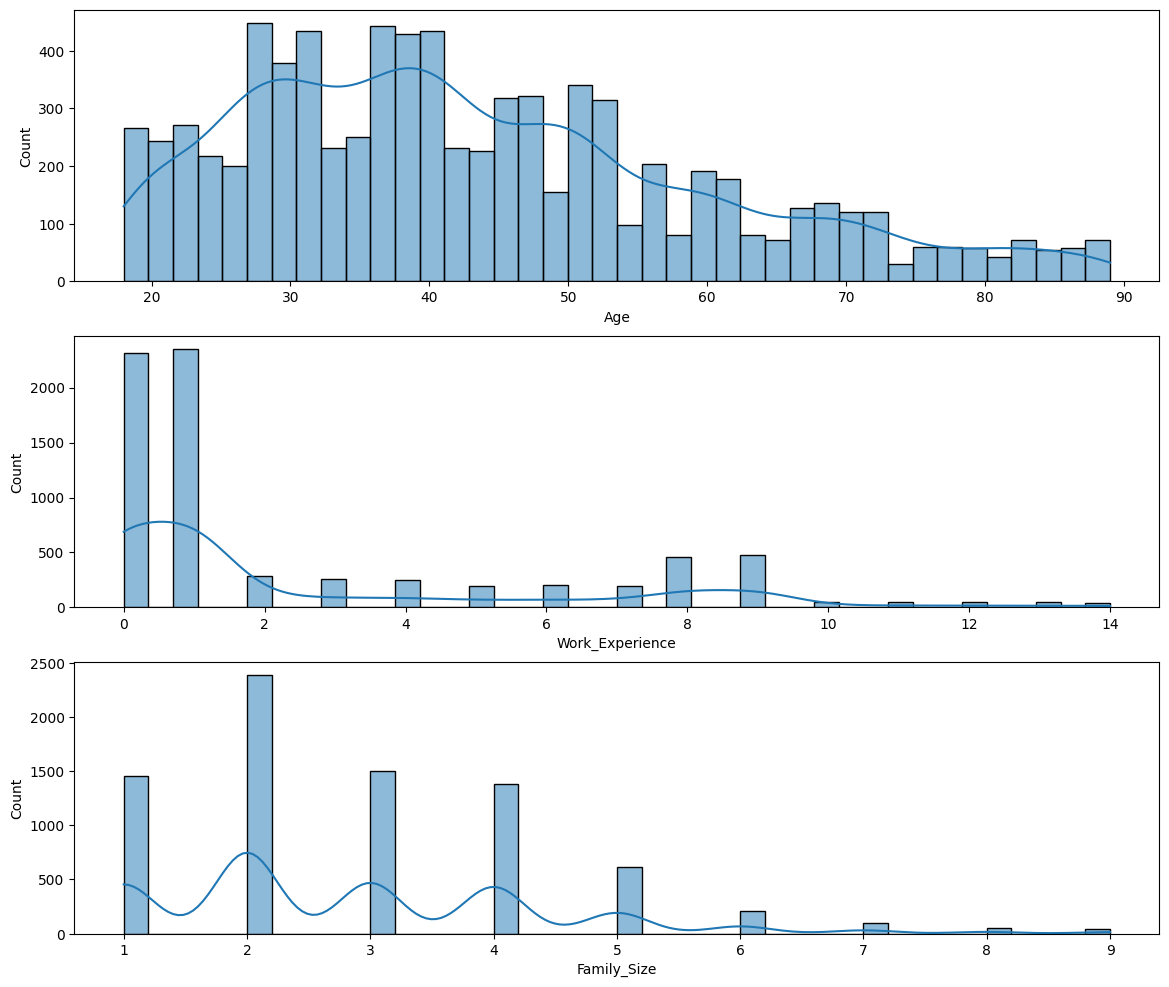

In [80]:
fig, axes = plt.subplots(3,1 , figsize=(14,12))
plt.subplots_adjust()
axes = axes.flatten()

for i in range(len(num)):
    sns.histplot(x = data[num[i]], palette = ["red","blue"], bins = 40,ax=axes[i], kde=True)

Age feature is some left skewed

<Axes: >

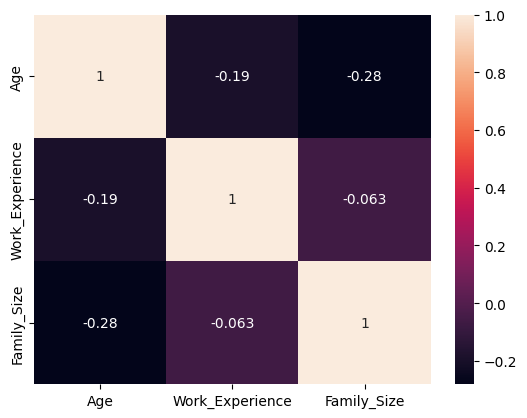

In [81]:
sns.heatmap(data[num].corr(), annot = True)



This heatmap shows us that there is no big corrolation between our varaibles apart from the ones that are pretty clear so this means that our variables in general are not in a linear relation


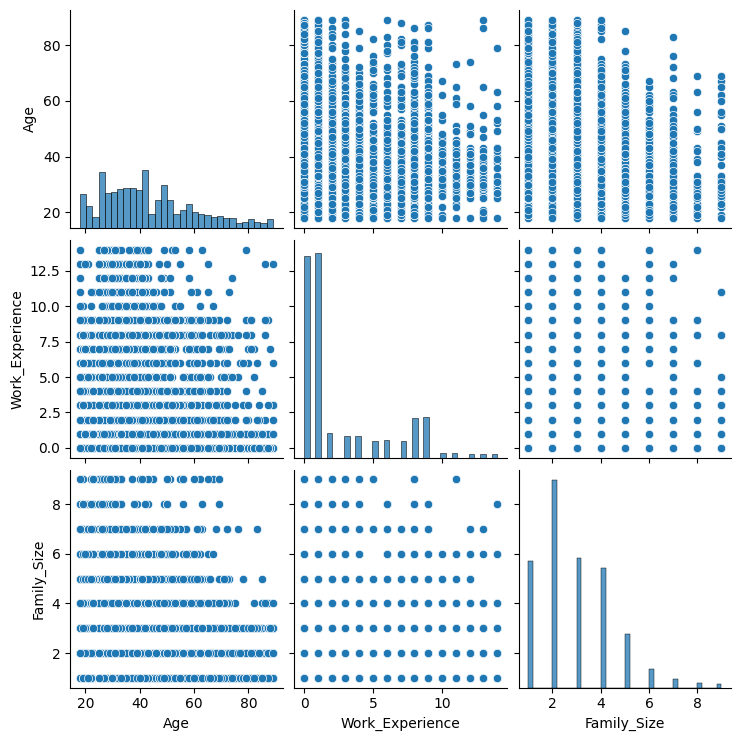

In [83]:
sns.pairplot(data=data[num ])

Analyzing categorical features

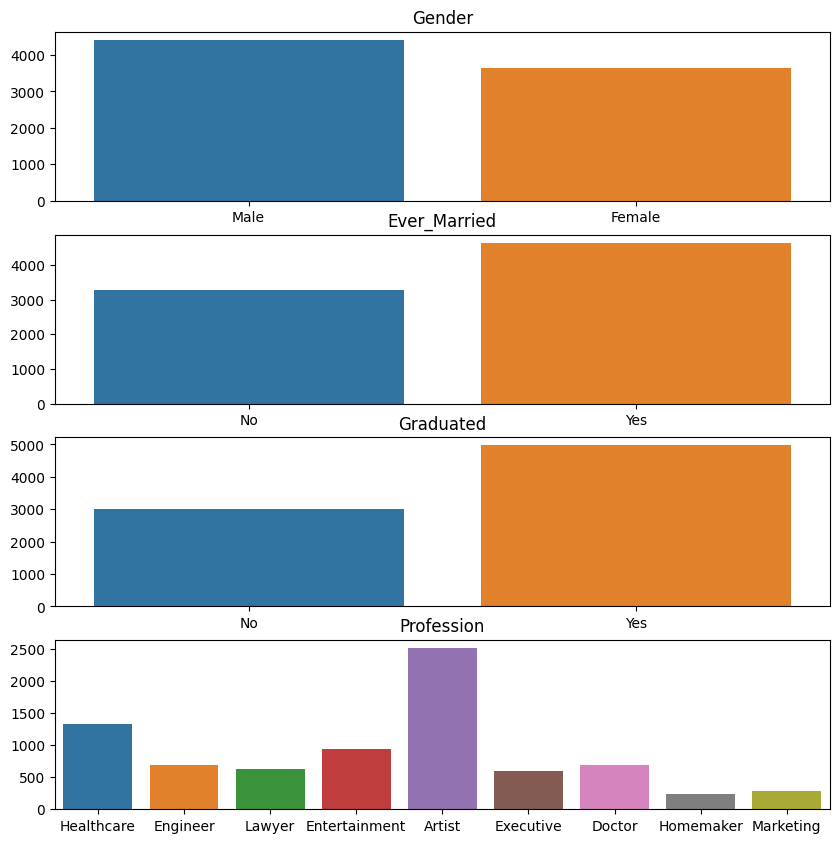

In [88]:
fig = plt.figure(figsize = (10, 18))
data_cat=data[cat]
i=1
for x in cat[:-1]:
    plt.subplot(7, 1, i)
    ax=sns.countplot(data =data_cat , x = data_cat[x])
    print("")
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()




* Gender, Ever_marrired and Graduated features are almost balanced.
* Among Profession Artist have more observations

### Handling null values

In [89]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [92]:
data.dropna(inplace=True)
data.reset_index(inplace=True)
data = pd.DataFrame(data.drop("index", axis=1))
data.shape

(6718, 8)

In [93]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
3,Male,Yes,56,No,Artist,0.0,Average,2.0
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0


### Outlier detection

Age 



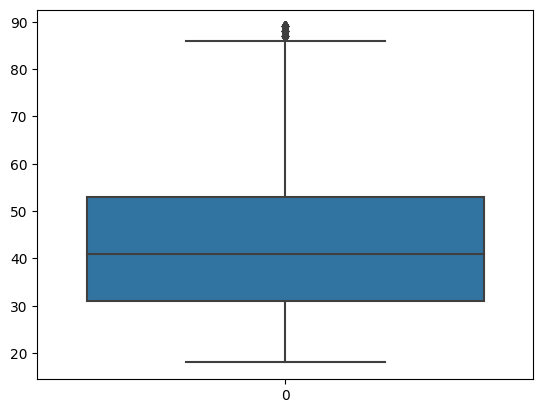

Work_Experience 



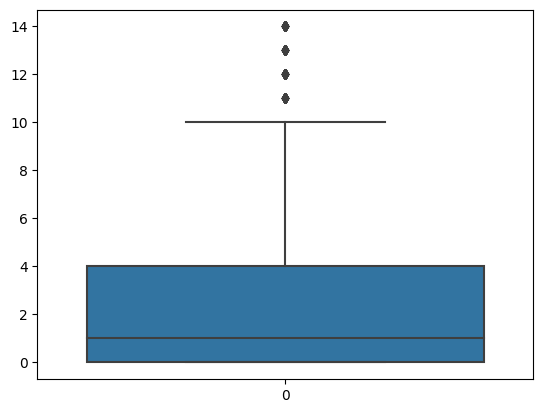

Family_Size 



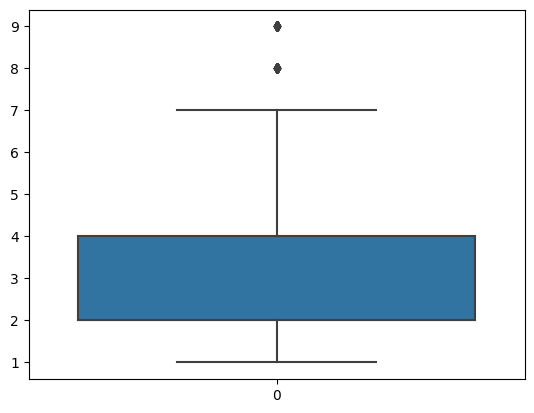

In [94]:
for col in num:
  print(col, '\n')
  sns.boxplot(data[col])
  plt.show()

In [95]:
# removing outliers

def outliers_iqr(col, data):
    dat = data[col]
    Q1 = np.percentile(dat, 25)
    Q3 = np.percentile(dat, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a boolean mask for outliers
    mask = (dat >= lower_bound) & (dat <= upper_bound)

    # Use the mask to filter the DataFrame
    data_no_outliers = data[mask]

    print(f"Removed {len(data) - len(data_no_outliers)} outliers from {col}")

    return data_no_outliers

for i in num:
  outliers_iqr(i, data)

print('\n', data.shape)

Removed 77 outliers from Age
Removed 177 outliers from Work_Experience
Removed 80 outliers from Family_Size

 (6718, 8)


In [96]:
data.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0


In [97]:
# apply LabelEncoder on the data

for_decoding=[]
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [98]:
# Standardizing data

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Clustering data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

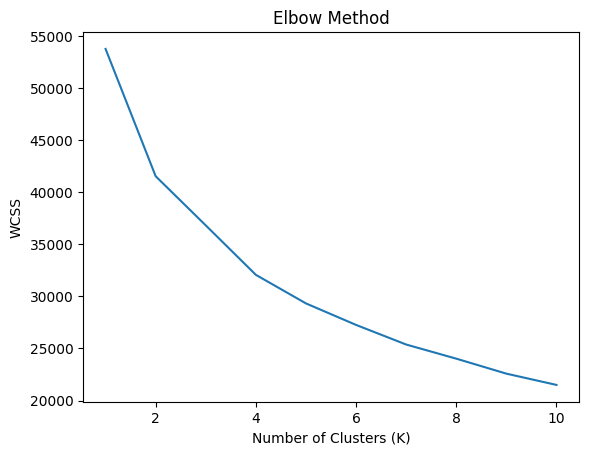

In [99]:
# using 'elbow Method' to find the optimal K

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [127]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [128]:
data_scaled['Cluster'] = kmeans.labels_

In [129]:
data_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,0.902604,-1.203804,-1.272236,-1.324114,0.912982,-0.478692,0.762325,0.760391,0
1,-1.107905,0.830700,1.384261,0.755222,-0.278357,-0.478692,0.762325,-1.209140,1
2,0.902604,0.830700,1.384261,0.755222,1.707208,-0.772431,-0.410671,-0.552630,1
3,0.902604,0.830700,0.720137,-1.324114,-1.072583,-0.772431,-1.583666,-0.552630,1
4,0.902604,-1.203804,-0.674524,0.755222,0.912982,-0.478692,0.762325,0.103881,0


In [130]:
print(kmeans.cluster_centers_)

[[-1.33134052e-01 -1.11986962e+00 -7.00892313e-01 -2.89578600e-01
   1.79666784e-01  1.26393393e-01  7.57775299e-01  1.28187302e-01
   1.00000000e+00]
 [ 9.72612500e-02  8.18122166e-01  5.12037764e-01  2.11552012e-01
  -1.31255796e-01 -9.23368527e-02 -5.53593701e-01 -9.36473952e-02
   1.12132525e-14]]


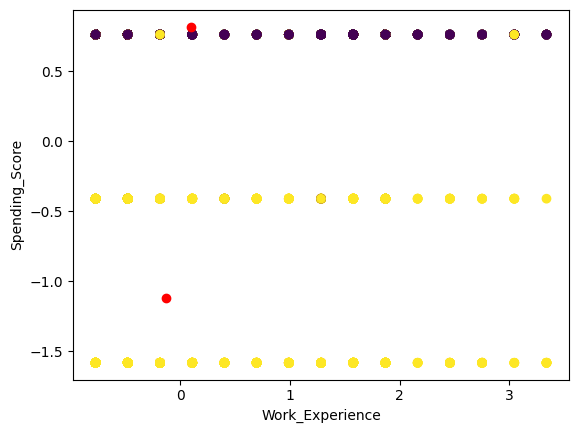

In [131]:
plt.scatter(data_scaled['Work_Experience'], data_scaled['Spending_Score'], c=data_scaled['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color='red') # cluster center
plt.xlabel('Work_Experience')
plt.ylabel('Spending_Score')
plt.show()

Clustering is ver poor


### Trying PCA for dimensionality reduction


In [147]:
data_scaled_ = data_scaled.drop('Cluster', axis=1)
data_scaled_.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.902604,-1.203804,-1.272236,-1.324114,0.912982,-0.478692,0.762325,0.760391
1,-1.107905,0.830700,1.384261,0.755222,-0.278357,-0.478692,0.762325,-1.209140
2,0.902604,0.830700,1.384261,0.755222,1.707208,-0.772431,-0.410671,-0.552630
3,0.902604,0.830700,0.720137,-1.324114,-1.072583,-0.772431,-1.583666,-0.552630
4,0.902604,-1.203804,-0.674524,0.755222,0.912982,-0.478692,0.762325,0.103881


In [188]:
# PCA
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_scaled_)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

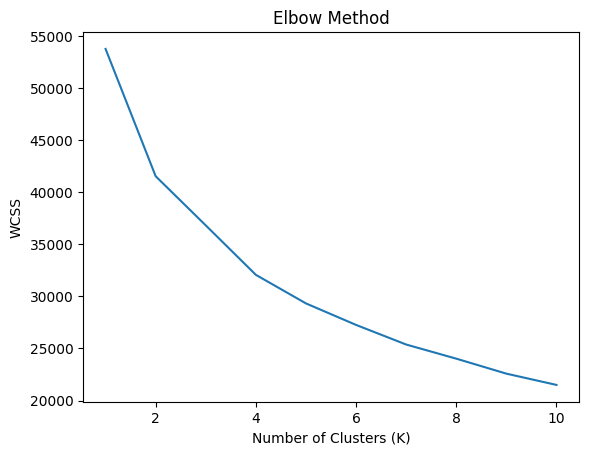

In [189]:
# 'elbow Method' to find the optimal K

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [190]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



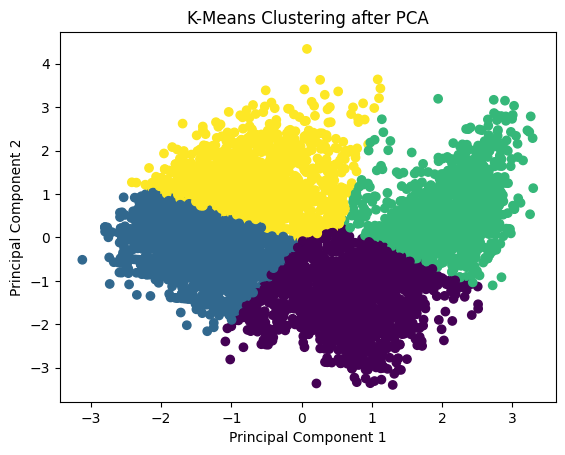

In [191]:
# Plot the PCA clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.show()

Now the points are clustered having a good separation

In [192]:
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z=[0] * len(pca_df),
    color='Cluster',
    opacity=0.8,
    size_max=10,
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    title='3D Clustering Visualization with PCA',
)

fig.show()

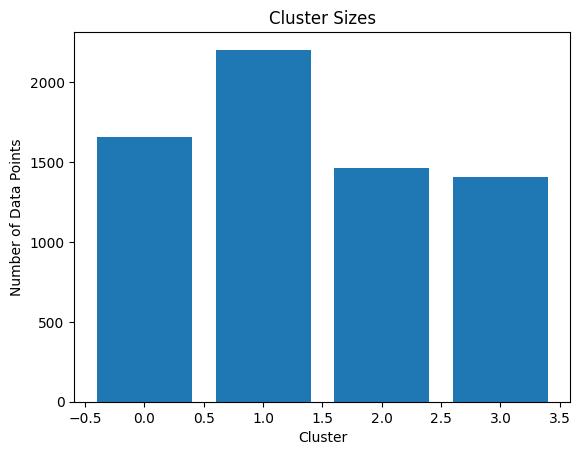

In [193]:
cluster_sizes = pca_df['Cluster'].value_counts()

plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.show()


The second cluster has the highest frequency among all categories. All other categories contins almost similar amount of datapoints

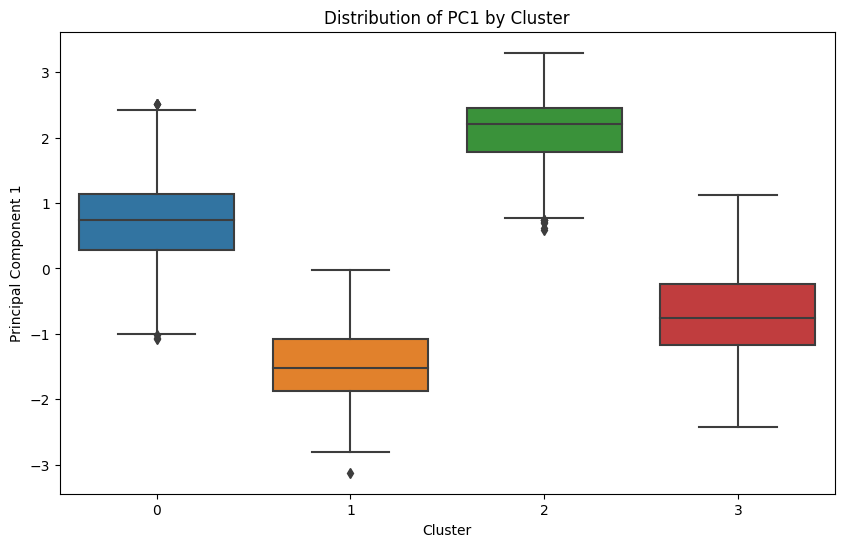

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='PC1', data=pca_df)
plt.xlabel('Cluster')
plt.ylabel('Principal Component 1')
plt.title('Distribution of PC1 by Cluster')
plt.show()

* Median of category 1 is larger than others
* There are some outliers spotted on category 1, 3and 4